In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px

In [2]:
sns.set_theme(color_codes=True)
sns.set_style('whitegrid')
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
X = df.drop('sales',axis=1)
y = df['sales']

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [9]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features_ = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features_, y, test_size=0.3, random_state=101)
    
    model_ = LinearRegression()
    model_.fit(X_train, y_train)
    
    train_predictions = model_.predict(X_train)
    test_predictions = model_.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_predictions))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    
    

In [10]:
train_rmse_errors

[1.7345941243293763,
 0.5879574085292234,
 0.43393443569020695,
 0.3517083688399349,
 0.2509342965968977,
 0.20148707132644098,
 5.258394206861527,
 0.20696080521253987,
 0.1695718505595044]

In [11]:
test_rmse_errors

[1.5161519375993882,
 0.6646431757269136,
 0.580328682521393,
 0.5077742637145953,
 2.575817506458751,
 4.1718001617579645,
 174.62982254526315,
 4679.50452620065,
 95835.8634070512]

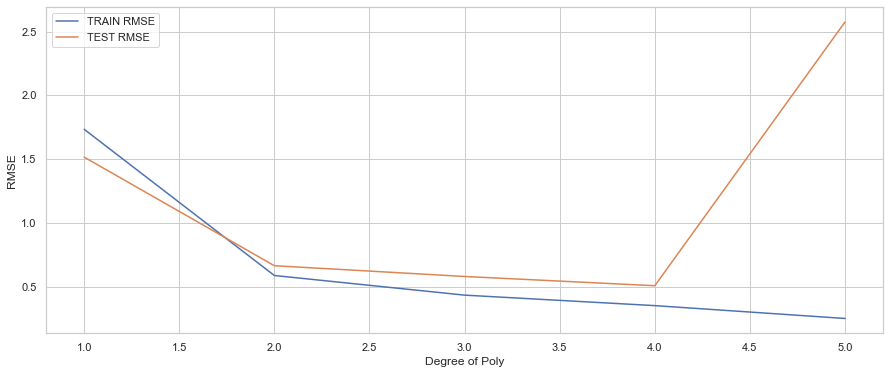

In [12]:
plt.figure(figsize=(15,6))
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')

plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

In [13]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [14]:
final_model = LinearRegression()

In [15]:
converted_X = final_poly_converter.fit_transform(X)

In [16]:
final_model.fit(converted_X,y)

LinearRegression()

### Saving the model

In [17]:
from joblib import load,dump

In [18]:
dump(final_model,'Final Model.joblib')

['Final Model.joblib']

In [19]:
dump(final_poly_converter,'Final Polynomial.joblib')

['Final Polynomial.joblib']

### Loading the model

In [20]:
loaded_FinalPoly = load("Final Polynomial.joblib")

In [21]:
loaded_FinalModel = load('Final Model.joblib')

### Using model 

In [22]:
campaign = [[149,22,12]]

In [23]:
transformed_data = loaded_FinalPoly.fit_transform(campaign)

In [24]:
print(loaded_FinalModel.predict(transformed_data))

[14.64501014]
